<a href="https://colab.research.google.com/github/patofw/imf_master/blob/master/Google_Colab/Visualizacion_de_Datos_en_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización de datos en Python 

La visualización de los datos es una las actividades más importantes y potentes para el análisis de datos. Los gráficos o plots no solo son  herramientas útiles para la presentación de resultados, pero también nos pueden ayudar en la exploración inicial de los datos, nos ayudan a encontrar datos anómalos (outliers) y nos ayudáran en el entendimiento del problema que buscamos resolver. 

La principal librería de Python para visualización es Matplotlib, aunque hay varias otras opciones también. En este tutorial veremos dos de las más importantes librerías: Matplotlib y Seaborn.

Es posible que necesites instalar Seaborn, para lo cual simplemente ejecuta en la consola pip install seaborn 
(También puedes hacerlo directamente en el notebook agregando el símbolo "!" en la celda -> !pip install seaborn

## Empezamos importando librerías y cargando los datos 

In [0]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [4]:
titanic = sns.load_dataset("titanic") # cargamos los datos 
titanic.head() # un vistazo a la cabecera

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## API de Pandas con Matplotlib

Pandas tiene una API que permite utilizar las funciones básicas de Matplotlib directamente sobre un Data Frame. Exploremos datos del Titanic, Por ejemplo:

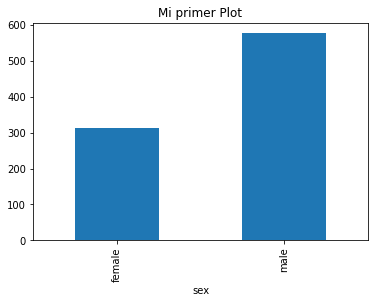

In [5]:
# Empezamos viendo la distribución del género 
by_sex = titanic.groupby("sex").size() # agrupamos por género y contamos ocurrencias
my_plot = by_sex.plot(kind='bar') 
my_plot.set_title("Mi primer Plot")
plt.style.use("ggplot")
plt.show();

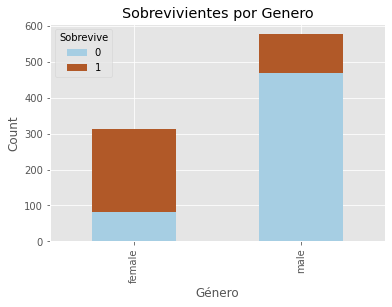

In [11]:
# veamos rápidamente si el género influye en la probabilidad de superviviencia
survived_group = titanic.groupby(['sex','survived']).size()
survived_plot = survived_group.unstack().plot(kind='bar',
                                           stacked=True,
                                           colormap='Paired',
                                           title="Sobrevivientes por Genero")
survived_plot.set_xlabel("Género")
survived_plot.set_ylabel("Count")
plt.legend(title = "Sobrevive")
plt.show();

Claramente ser mujer te garantizaba una mayor probabilidad de sobrevivir en el barco, pues a pesar de que hubo más hombres que sobrevivieron, proporcionalmente la probabilidad de supervivencia fue mucho mayor en mujeres. Dicho esto... 
Afecta la clase del camarote? 


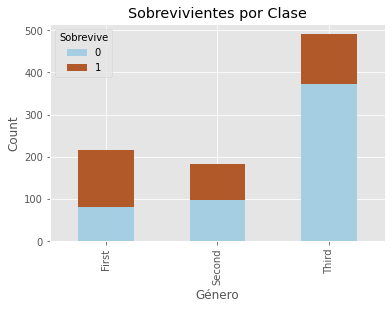

In [14]:
survived_group = titanic.groupby(['class','survived']).size()
survived_plot = survived_group.unstack().plot(kind='bar',
                                           stacked=True,
                                           colormap='Paired',
                                           title="Sobrevivientes por Clase")
survived_plot.set_xlabel("Género")
survived_plot.set_ylabel("Count")
plt.legend(title = "Sobrevive")
plt.show();

La penalización por estar en la tercera clase es evidente...

Bueno, ahora exploremos la edad de los tripulantes del barco

Text(0.5, 1.0, 'Edad de los tripulantes del Titanic')

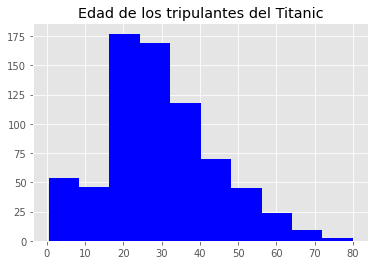

In [17]:
titanic.age.hist(color = "blue") # Histograma directamente desde pandas
plt.title("Edad de los tripulantes del Titanic")

**Challenge:** Qué grupo de edad tenía más probabilidades de sobrevivir? 
- Los menores de 15
- Los adultos entre 15 y 50
- Mayores de 50

## Pie charts

Las gráficas de pastel son de las más comunes entre el mundo empresarial, sin embargo no son las más recomendadas en el mundo de la ciencia de datos pues se considera que no revelan mucha información y que hay mejores alternativas. Sin embargo, aquí está un ejemplo de cómo hacer un gráfico de pastel en Python, por si algún día te lo piden...

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


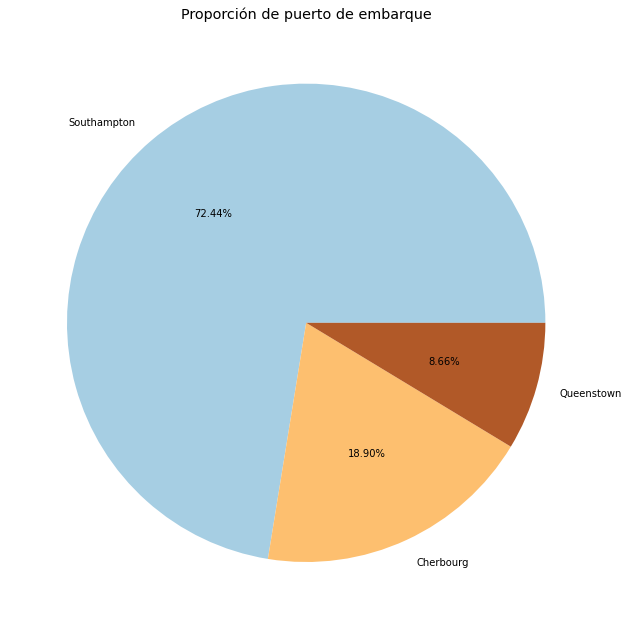

In [19]:
titanic.embark_town.value_counts().plot(figsize=(11,11),
                                    kind='pie',
                                    autopct='%.2f%%',
                                    colormap="Paired")
plt.axes().set_ylabel('')
plt.title("Proporción de puerto de embarque")
plt.show();


Ahora veamos relaciones enter las variables. Te dice algo la relación entre edad y tarifa (fare)?}


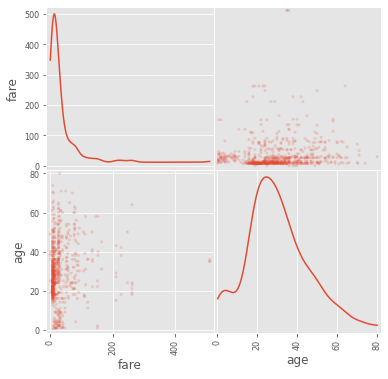

In [27]:
# Scatter matrix -> Esta matriz es muy útil para buscar relaciones entre variables
spm = pd.plotting.scatter_matrix(titanic[["fare","age"]],alpha=0.2,figsize=(6,6),
                                      diagonal='kde')

plt.show()

## Configuraciones más avanzadas utilizando matplotlib

La API de pandas es muy útil para exploraciones rápidas, pero si queremos realizar gráficos más complejos, es necesario realizarlo directamente en Matplotlib

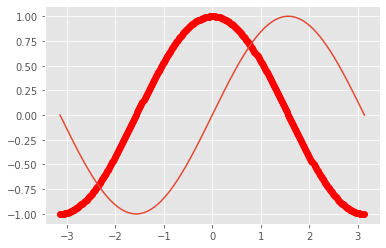

In [29]:
%matplotlib inline

#Las funciones de ploteo asumen que el primer set de valores está en la x y el segundo en y
X = np.linspace(-np.pi, np.pi, 300, endpoint=True)
C = np.cos(X)
S = np.sin(X)

plt.plot(X,C,"ro")
plt.plot(X,S)
plt.show()

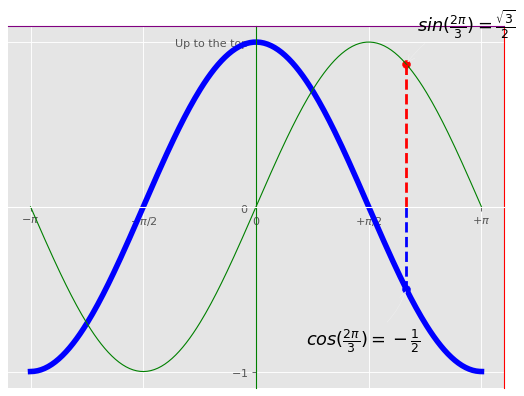

In [34]:
# Creamos una figura de 8 pulgadas . 
# La siguiente línea crea el método, pero aún no tiene un objeto que renderizar
plt.figure(figsize=(8, 6), dpi=80)

# Creamos un nuevo subplot en una matriz de 1x1, esto nos permitirá combinar plots
plt.subplot(1, 1, 1)
# Creamos nuestro X, y calculamos el coseno y su seno
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

# Coseno lo pintamos de color azul
plt.plot(X, C, color="blue", linewidth=5.0, linestyle="-")

# El Seno lo representamos de color verde con otra línea contínua 
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-")

# Configuramos límites para x,y
plt.xlim(X.min() * 1.1, X.max() * 1.1)
plt.ylim(C.min() * 1.1, C.max() * 1.1)

# Utilizamos látex para configurar los ejes
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
          [r'$-1$', r'$0$', "Up to the top"])

# Decoramos los ejes del plot
ax = plt.gca()  # gca stands for 'get current axe'
ax.spines['right'].set_color('red')
ax.spines['left'].set_color('green')
ax.spines['top'].set_color('purple')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

t = 2 * np.pi / 3
plt.plot([t, t], [0, np.cos(t)], color='blue', linewidth=2.5, linestyle="--")
plt.scatter([t, ], [np.cos(t), ], 50, color='blue')

# Utilizamos anotaciones para pintar las fórmulas 
plt.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t, t],[0, np.sin(t)], color='red', linewidth=2.5, linestyle="--")
plt.scatter([t, ],[np.sin(t), ], 50, color='red')

plt.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
# Show result on screen
plt.show();

## Multiples Plots

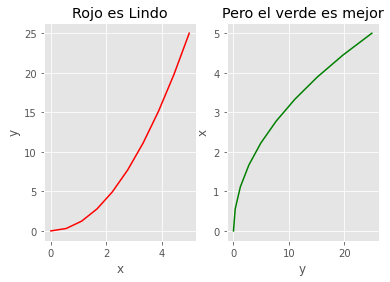

In [36]:
x = np.linspace(0, 5, 10)
y = x ** 2
fig, axes = plt.subplots(nrows=1, ncols=2)

ax = axes[0]
ax.plot(x, y, 'r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Rojo es Lindo')
    
axes2= axes[1] 
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('Pero el verde es mejor');

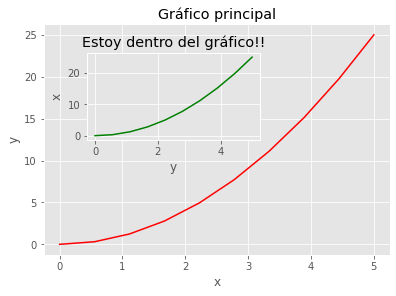

In [38]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# figura principal
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('Gráfico principal')

# Figura secundaria
axes2.plot(x, y, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('Estoy dentro del gráfico!!');

## Doble eje Y

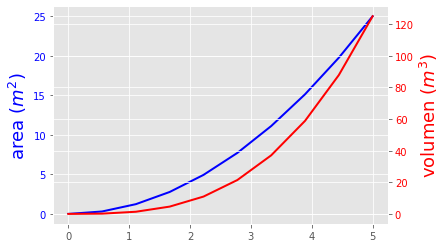

In [40]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volumen $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

## Figuras 3D

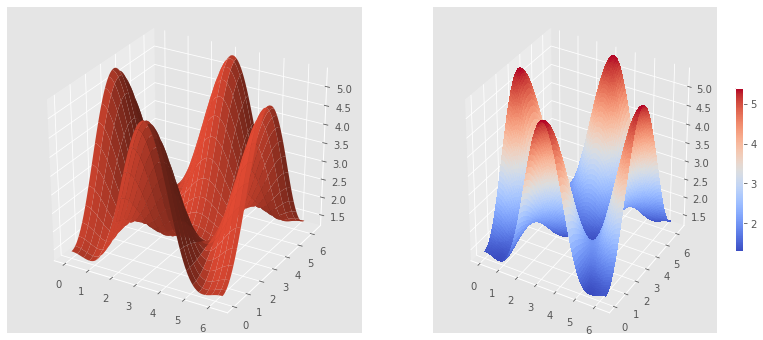

In [46]:
import matplotlib
def flux_qubit_potential(phi_m, phi_p):
  flux = 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)
  return flux
alpha = 0.7
phi_ext = 2 * np.pi * 0.5
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T
fig = plt.figure(figsize=(14,6))

# `ax` puede recibir el paramatro 3d dentro de projection, 
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# pintamos la superficie con escala de color degradado
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

## Utilizando Seaborn 

Seaborn nos facilita mucho la vida con plots elegantes, pero sencillos de realizar. Para ello cargamos otro de sus famosos datasets -> Iris, que contiene información sobre distintos tipos de flores y sus atributos

In [55]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


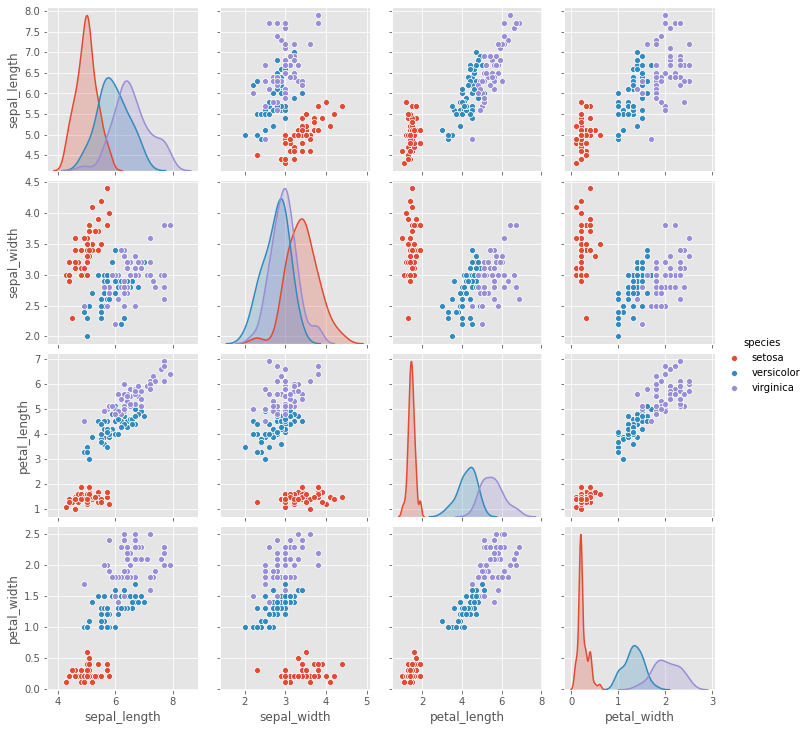

In [48]:
# Análisis de la relación enter variables
g = sns.pairplot(iris, hue="species")

Podemos analizar las relaciones de las variables con gráficos de regresión 

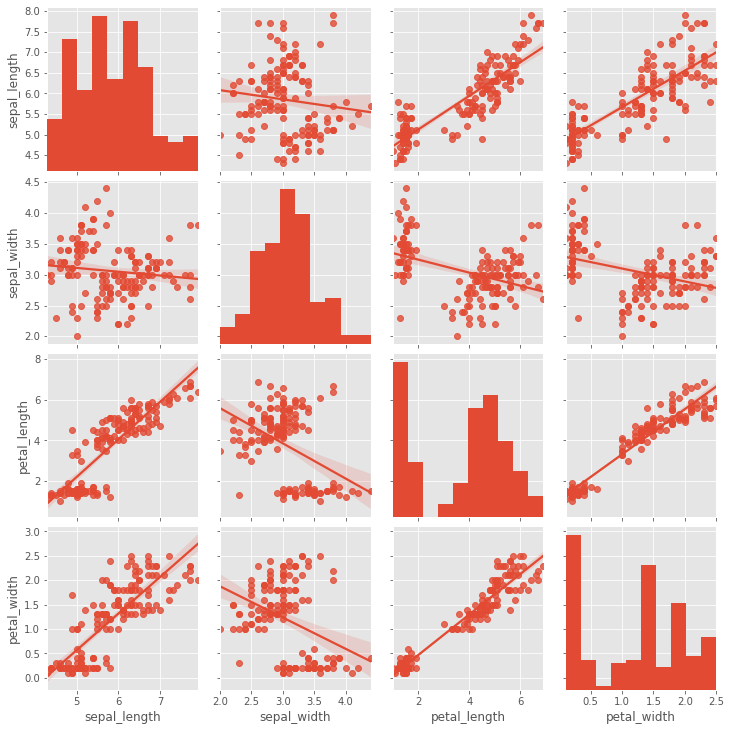

In [49]:
g = sns.pairplot(iris, kind="reg") # regresión entre variables

## Plots de distribución



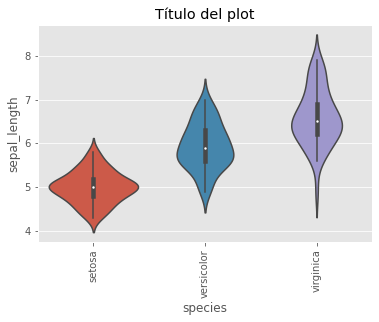

In [58]:
sns.violinplot(x='species',y='sepal_length',data=iris) # diagrama de violín. 
# Puedes agregar atributos de PLT a tus figuras!!
plt.title("Título del plot")
plt.xticks(rotation = "vertical")
plt.show();
